In [201]:
import numpy as np
import copy, math
import pandas as pd
from IPython.display import display
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [101]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [157]:
plt.style.use("dark_background")

In [7]:
# Data Set
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1)
print(f"X_train matrix: \n {X_train}")
print(f"y_train matrix: \n {y_train}")

X_train matrix: 
 [[0.5 1.5]
 [1.  1. ]
 [1.5 0.5]
 [3.  0.5]
 [2.  2. ]
 [1.  2.5]]
y_train matrix: 
 [[0]
 [0]
 [0]
 [1]
 [1]
 [1]]


In [27]:
# Experimenting X matrix
shape = X_train.shape
print(f"Shape of matrix: {shape}")
m,n = shape
print(f"Rows (Training examples): {m}")
print(f"Columns (Number of features): {n}")
# Accessing columns
first_feature = X_train[:,0]
sec_feature = X_train[:,1]
print(f"First Feature: \n {first_feature}")
print(f"Second Feature: \n {sec_feature}")
# Type
print(type(first_feature))
print(type(sec_feature))
# Shape of features
x1_shape = first_feature.shape
print(x1_shape)
x2_shape = sec_feature.shape
print(x2_shape)

Shape of matrix: (6, 2)
Rows (Training examples): 6
Columns (Number of features): 2
First Feature: 
 [0.5 1.  1.5 3.  2.  1. ]
Second Feature: 
 [1.5 1.  0.5 0.5 2.  2.5]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(6,)
(6,)


In [25]:
# Converting to column matrix
x1_cmatrix = first_feature.reshape(-1,1)
x2_cmatrix = sec_feature.reshape(-1,1)
print(f"First feature matrix: \n {x1_cmatrix}")
print(f"Second Feature matrix: \n {x2_cmatrix}")
# Type/shape of column matrix
print(type(x1_cmatrix))
print(type(x2_cmatrix))
x1_cshape = x1_cmatrix.shape
print(f"Shape of first feature column matrix: {x1_cshape}")
x2_cshape = x2_cmatrix.shape
print(f"Shape of second feature column matrix: {x2_cshape}")

First feature matrix: 
 [[0.5]
 [1. ]
 [1.5]
 [3. ]
 [2. ]
 [1. ]]
Second Feature matrix: 
 [[1.5]
 [1. ]
 [0.5]
 [0.5]
 [2. ]
 [2.5]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Shape of first feature column matrix: (6, 1)
Shape of second feature column matrix: (6, 1)


In [26]:
# Converting to row matrix
x1_rmatrix = first_feature.reshape(1,-1)
x2_rmatrix = sec_feature.reshape(1,-1)
print(f"First feature matrix: \n {x1_rmatrix}")
print(f"Second Feature matrix: \n {x2_rmatrix}")

# Type/shape of row matrix
print(type(x1_rmatrix))
print(type(x2_rmatrix))
x1_rshape = x1_rmatrix.shape
print(f"Shape of first feature row matrix: {x1_rshape}")
x2_rshape = x2_rmatrix.shape
print(f"Shape of second feature row matrix: {x2_rshape}")

First feature matrix: 
 [[0.5 1.  1.5 3.  2.  1. ]]
Second Feature matrix: 
 [[1.5 1.  0.5 0.5 2.  2.5]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Shape of first feature row matrix: (1, 6)
Shape of second feature row matrix: (1, 6)


In [29]:
# Merging two column features into matrix (horizontally)
feature_matrix = np.hstack((x1_cmatrix, x2_cmatrix))
print(f"FEATURE MATRIX: \n {feature_matrix}")
# Shape
shape_feature_matrix = feature_matrix.shape
print(f"Shape of Feature matrix: {shape_feature_matrix}")
# Rows/Columns
rows,cols = shape_feature_matrix
print(f"Rows of feature matrix: {rows}")
print(f"Columns of feature matrix: {cols}")

FEATURE MATRIX: 
 [[0.5 1.5]
 [1.  1. ]
 [1.5 0.5]
 [3.  0.5]
 [2.  2. ]
 [1.  2.5]]
Shape of Feature matrix: (6, 2)
Rows of feature matrix: 6
Columns of feature matrix: 2


In [30]:
# Merging two rows features into matrix (horizontally)
feature_matrix_row = np.hstack((x1_rmatrix, x2_rmatrix))
print(f"FEATURE MATRIX: \n {feature_matrix_row}")
# Shape
shape_feature_matrix_row = feature_matrix_row.shape
print(f"Shape of Feature matrix: {shape_feature_matrix_row}")
# Rows/Columns
rows,cols = shape_feature_matrix_row
print(f"Rows of feature matrix: {rows}")
print(f"Columns of feature matrix: {cols}")

FEATURE MATRIX: 
 [[0.5 1.  1.5 3.  2.  1.  1.5 1.  0.5 0.5 2.  2.5]]
Shape of Feature matrix: (1, 12)
Rows of feature matrix: 1
Columns of feature matrix: 12


In [31]:
# Merging two column features into matrix (vertically)
feature_matrix = np.vstack((x1_cmatrix, x2_cmatrix))
print(f"FEATURE MATRIX: \n {feature_matrix}")
# Shape
shape_feature_matrix = feature_matrix.shape
print(f"Shape of Feature matrix: {shape_feature_matrix}")
# Rows/Columns
rows,cols = shape_feature_matrix
print(f"Rows of feature matrix: {rows}")
print(f"Columns of feature matrix: {cols}")

FEATURE MATRIX: 
 [[0.5]
 [1. ]
 [1.5]
 [3. ]
 [2. ]
 [1. ]
 [1.5]
 [1. ]
 [0.5]
 [0.5]
 [2. ]
 [2.5]]
Shape of Feature matrix: (12, 1)
Rows of feature matrix: 12
Columns of feature matrix: 1


In [32]:
# Merging two rows features into matrix (vertically)
feature_matrix_row = np.vstack((x1_rmatrix, x2_rmatrix))
print(f"FEATURE MATRIX: \n {feature_matrix_row}")
# Shape
shape_feature_matrix_row = feature_matrix_row.shape
print(f"Shape of Feature matrix: {shape_feature_matrix_row}")
# Rows/Columns
rows,cols = shape_feature_matrix_row
print(f"Rows of feature matrix: {rows}")
print(f"Columns of feature matrix: {cols}")

FEATURE MATRIX: 
 [[0.5 1.  1.5 3.  2.  1. ]
 [1.5 1.  0.5 0.5 2.  2.5]]
Shape of Feature matrix: (2, 6)
Rows of feature matrix: 2
Columns of feature matrix: 6


In [35]:
# Tagging
def tag(X):
    m = X.shape[0]
    my_tag_list = []
    for i in range(m):
        if X[i] == 0:
            my_tag_list.append("Negative")
        else:
            my_tag_list.append("Positive")
    return my_tag_list

In [36]:
#Taglist
tag_list = tag(y_train)
print(tag_list)

['Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive']


In [80]:
# Displaying Data
def data_display(X,y):
    t = tag(y)
    my_data_mat = np.c_[X,y]
    data = {"X1":my_data_mat[:,0], "X2":my_data_mat[:,1], "y": my_data_mat[:,2].astype('int'), "Tags":t}
    df = pd.DataFrame(data)
    return df

In [81]:
# Displaying Data 
dataframe = data_display(X_train, y_train)
display(dataframe)

,X1,X2,y,Tags
0,0.5,1.5,0,Negative
1,1.0,1.0,0,Negative
2,1.5,0.5,0,Negative
3,3.0,0.5,1,Positive
4,2.0,2.0,1,Positive
5,1.0,2.5,1,Positive


In [47]:
# Converting a list of tuples of feature matrix
x00 = X_train[0,0]
x01 = X_train[0,1]
print(f"X_00 = {x00}")
print(f"X_01 = {x01}")
x0 = (x00, x01)
print(x0)
print(type(x0))
m,n = X_train.shape
tuple_list = []
count = 0
for i in range(m):
    count = count + 1
    for j in range(n):
        if j == 0:
            a = X_train[i,0]
        elif j == 1:
            b = X_train[i,1]
    tuple_list.append((a,b))
print(tuple_list)

X_00 = 0.5
X_01 = 1.5
(0.5, 1.5)
<class 'tuple'>
[(0.5, 1.5), (1.0, 1.0), (1.5, 0.5), (3.0, 0.5), (2.0, 2.0), (1.0, 2.5)]


In [48]:
# Making function
def feature_tuple_list(X):
    m,n = X_train.shape
    tuple_list = []
    for i in range(m):
        for j in range(n):
            if j == 0:
                a = X[i,0]
            elif j == 1:
                b = X[i,1]
        tuple_list.append((a,b))
    return tuple_list

In [49]:
ft_list = feature_tuple_list(X_train)
print(ft_list)

[(0.5, 1.5), (1.0, 1.0), (1.5, 0.5), (3.0, 0.5), (2.0, 2.0), (1.0, 2.5)]


In [52]:
# Splitting Data
print(len(ft_list))

6


In [61]:
# Converting y_train to list
y_train_reshape = y_train.reshape(1,-1)
print(y_train_reshape)
y_list = []
m,n = y_train_reshape.shape
for i in range(m):
    for j in range(n):
        y_list.append(y_train_reshape[i,j])

print(y_list)
my_dict = dict(zip(ft_list, y_list))
print(my_dict)

[[0 0 0 1 1 1]]
[0, 0, 0, 1, 1, 1]
{(0.5, 1.5): 0, (1.0, 1.0): 0, (1.5, 0.5): 0, (3.0, 0.5): 1, (2.0, 2.0): 1, (1.0, 2.5): 1}


In [62]:
# Making feature dictionary
def data_dic(feature_list, output_matrix):
    out_rshp = output_matrix.reshape(1,-1)
    y_list = []
    m,n = out_rshp.shape
    for i in range(m):
        for j in range(n):
            y_list.append(out_rshp[i,j])
    my_dict = dict(zip(feature_list, y_list))
    return my_dict

In [63]:
my_data_dic = data_dic(ft_list, y_train)
print(my_data_dic)

{(0.5, 1.5): 0, (1.0, 1.0): 0, (1.5, 0.5): 0, (3.0, 0.5): 1, (2.0, 2.0): 1, (1.0, 2.5): 1}


In [64]:
neg_data_x = []
neg_data_y = []
pos_data_x = []
pos_data_y = []

for j,k in my_data_dic.items():
    if k == 0:
        neg_data_x.append(j)
        neg_data_y.append(k)
for j,k in my_data_dic.items():
    if k == 1:
        pos_data_x.append(j)
        pos_data_y.append(k)

print(neg_data_x)
print(neg_data_y)
print(pos_data_x)
print(pos_data_y)

[(0.5, 1.5), (1.0, 1.0), (1.5, 0.5)]
[0, 0, 0]
[(3.0, 0.5), (2.0, 2.0), (1.0, 2.5)]
[1, 1, 1]


In [72]:
neg_x_array = np.array(neg_data_x)
neg_y_array = np.array(neg_data_y)
pos_x_array = np.array(pos_data_x)
pos_y_array = np.array(pos_data_y)

data1 = np.c_[neg_x_array, neg_y_array]
print(data1)
data2 = np.c_[pos_x_array, pos_y_array]
print(data2)

[[0.5 1.5 0. ]
 [1.  1.  0. ]
 [1.5 0.5 0. ]]
[[3.  0.5 1. ]
 [2.  2.  1. ]
 [1.  2.5 1. ]]


In [82]:
data1 = data_display(neg_x_array, neg_y_array)
display(data1)
data2 = data_display(pos_x_array, pos_y_array)
display(data2)

,X1,X2,y,Tags
0,0.5,1.5,0,Negative
1,1.0,1.0,0,Negative
2,1.5,0.5,0,Negative


,X1,X2,y,Tags
0,3.0,0.5,1,Positive
1,2.0,2.0,1,Positive
2,1.0,2.5,1,Positive


In [91]:
def Data_split(X_matrix, y_matrix):
    data_frame = data_display(X_matrix, y_matrix)
    ft_list = feature_tuple_list(X_matrix)
    data_dictionary = data_dic(ft_list,y_matrix)
    
    neg_data_x = []
    neg_data_y = []
    pos_data_x = []
    pos_data_y = []

    for j,k in data_dictionary.items():
        if k == 0:
            neg_data_x.append(j)
            neg_data_y.append(k)
    for j,k in data_dictionary.items():
        if k == 1:
            pos_data_x.append(j)
            pos_data_y.append(k)
            
    neg_x_array = np.array(neg_data_x)
    neg_y_array = np.array(neg_data_y)
    pos_x_array = np.array(pos_data_x)
    pos_y_array = np.array(pos_data_y)
    
    data1 = data_display(neg_x_array, neg_y_array)
    data2 = data_display(pos_x_array, pos_y_array)
    
    d1 = display(data_frame)
    d2 = display(data1)
    d3 = display(data2)
    
   

In [92]:
Data_split(X_train, y_train)

,X1,X2,y,Tags
0,0.5,1.5,0,Negative
1,1.0,1.0,0,Negative
2,1.5,0.5,0,Negative
3,3.0,0.5,1,Positive
4,2.0,2.0,1,Positive
5,1.0,2.5,1,Positive


,X1,X2,y,Tags
0,0.5,1.5,0,Negative
1,1.0,1.0,0,Negative
2,1.5,0.5,0,Negative


,X1,X2,y,Tags
0,3.0,0.5,1,Positive
1,2.0,2.0,1,Positive
2,1.0,2.5,1,Positive


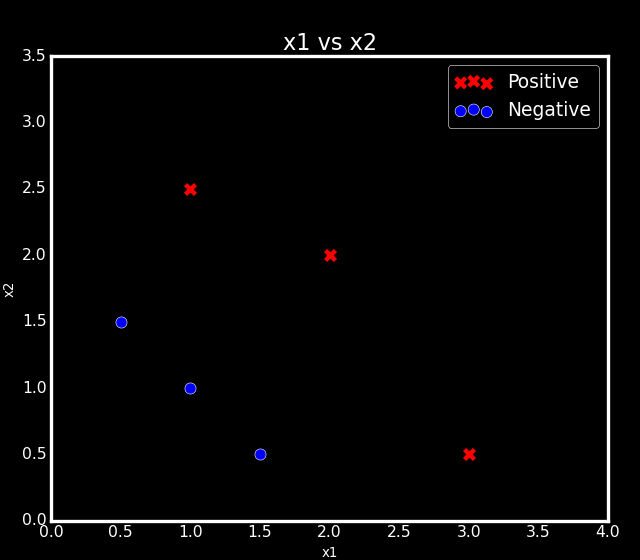

In [162]:
# Plotting data points
fig,ax = plt.subplots(1,1,figsize=(8,7))
ax.scatter(pos_x_array[:,0], pos_x_array[:,1], marker='x', s=80, c = 'red', label="Positive")
ax.scatter(neg_x_array[:,0], neg_x_array[:,1], marker='o', s=100, label="Negative")
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('x2', fontsize=12)
ax.set_xlabel('x1', fontsize=12)
ax.set_title('x1 vs x2')
ax.grid()
ax.legend()

Text(0.5, 0.92, 'Negative Data Points')

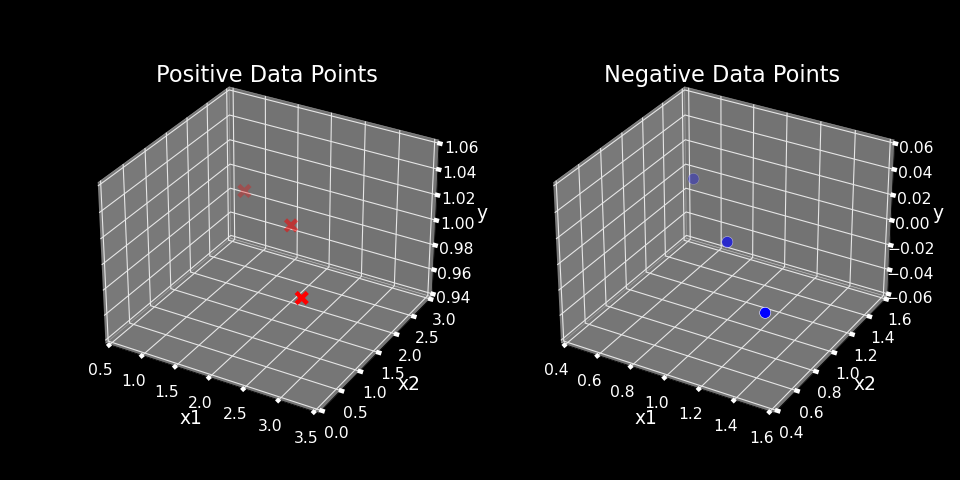

In [181]:
# Subplotting data points in 3d scatter plot
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter3D(pos_x_array[:,0], pos_x_array[:,1], pos_y_array, marker='x', s=100, c = 'red')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
ax.set_title("Positive Data Points")
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(neg_x_array[:,0], neg_x_array[:,1], neg_y_array, marker='o', s=100, c = 'blue')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
ax.set_title("Negative Data Points")

In [189]:
def sigmoid(z):
    z = np.clip( z, -500, 500 ) # Protect against overflow
    g = 1.0/(1.0+np.exp(-z))
    return g

In [190]:
def compute_logistic_cost(X,y,w,b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
        
    cost = cost / m
    return cost

In [200]:
y_train_new = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([1,1])
b_tmp = -3
model_cost = compute_logistic_cost(X_train, y_train_new, w_tmp, b_tmp)
print(f"Cost for b = -3: {model_cost}")
b_tmp_2 = -4
model_cost_2 = compute_logistic_cost(X_train, y_train_new, w_tmp, b_tmp_2)
print(f"Cost for b = -4: {model_cost_2}")

Cost for b = -3: 0.36686678640551745
Cost for b = -4: 0.5036808636748461


In [202]:
def compute_gradient_logistic(X, y, w, b): 
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw  

In [205]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_logistic_cost(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history

In [212]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000
np.set_printoptions(precision=2)
w_out, b_out, _ = gradient_descent(X_train, y_train_new, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out:.2f}")

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870457   
Iteration 2000: Cost 0.08460064176930078   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.04290759421682   
Iteration 5000: Cost 0.03433847729884557   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.02450156960879306   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   

updated parameters: w:[5.28 5.08], b:-14.22


In [251]:
# Decision Boundary
np.set_printoptions(precision=2)
#x1 intercept
x0_1intercept = 0
x1_1intercept = (-b_out - w_out[0]*x0_1intercept) / w_out[1]
x1_1intercept_round = np.around(x1_1intercept,2)

#x0 intercept
x1_0intercept = 0
x0_0intercept = (-b_out - w_out[1]*x1_0intercept) / w_out[0]
x0_0intercept_round = np.around(x0_0intercept, 2)

print(f"X0 intercept ({x0_0intercept_round}, {x1_0intercept})")
print(f"X1 intercept ({x0_1intercept}, {x1_1intercept_round})")

coord1 = (x0_0intercept_round, x1_0intercept)
coord2 = (x0_1intercept, x1_1intercept_round)

line = [coord1, coord2]
print(line)

line_matrix = np.array(line)
print(line_matrix)

X0 intercept (2.69, 0)
X1 intercept (0, 2.8)
[(2.69, 0), (0, 2.8)]
[[2.69 0.  ]
 [0.   2.8 ]]


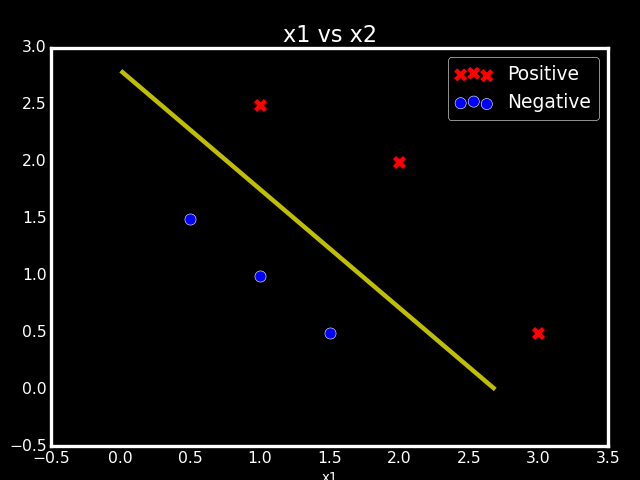

In [253]:
fig,ax = plt.subplots(1,1)
#ax.plot(x0,x1,c="y")
plt.plot(line_matrix[:,0], line_matrix[:,1], c='y')
ax.scatter(pos_x_array[:,0], pos_x_array[:,1], marker='x', s=80, c = 'red', label="Positive")
ax.scatter(neg_x_array[:,0], neg_x_array[:,1], marker='o', s=100, label="Negative")
ax.set_ylabel('x2', fontsize=12)
ax.set_xlabel('x1', fontsize=12)
ax.set_title('x1 vs x2')
ax.grid()
ax.legend()

In [254]:
# Predicting model
def model(input_x, input_w, b):
    out_pred = np.dot(input_w, input_x) + b
    return out_pred

In [264]:
in_x = np.array([1.37, 1.56])
y_hat = model(in_x, w_out, b_out)
if y_hat >= 0:
    print(f"Prediction score: {y_hat}")
    print("THREAT ALERT!!!")
else:
    print(f"Prediction score: {y_hat}")
    print("SAFE.")

Prediction score: 0.9372089769886909
THREAT ALERT!!!
